In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [5]:
print(tf.__version__)

2.0.0-rc0


### Data

In [0]:
from tensorflow.keras.datasets import mnist

In [8]:
# load data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


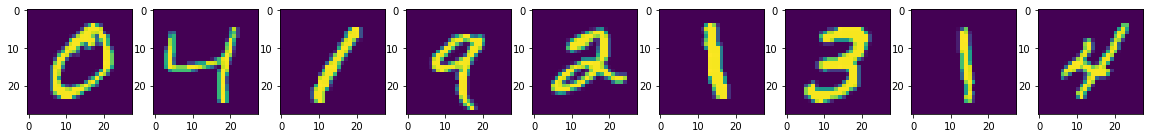

In [14]:
# plot some images
plt.figure(figsize=(20,5))
for i in range(1,10):
  plt.subplot(1,9,i)
  plt.imshow(X_train[i])

In [15]:
# shape of train and test data
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [17]:
# min and max pixel values in data
X_train.min()  

0

In [18]:
X_train.max()

255

In [0]:
# Normalizing the data betweem range 0 and 1
X_train = X_train/255
X_test = X_test/255

In [0]:
# Reshaping the data to 3 dimensional for CNN
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [22]:
# shape of an input observation
X_train[0].shape

(28, 28, 1)

### BUILD CNN

In [0]:
model = Sequential()

# 1st CNN layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = X_train[0].shape))

#2nd CNN layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# Flatten the layer
model.add(Flatten())

#Dense layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

#output layer
model.add(Dense(units=10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# train the model
history = model.fit(X_train, y_train, batch_size = 128, epochs=10, verbose=1, validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.2347 - accuracy: 0.9294 - val_loss: 0.0532 - val_accuracy: 0.9837
Epoch 2/10
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.0861 - accuracy: 0.9746 - val_loss: 0.0378 - val_accuracy: 0.9879
Epoch 3/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0640 - accuracy: 0.9802 - val_loss: 0.0349 - val_accuracy: 0.9888
Epoch 4/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0515 - accuracy: 0.9836 - val_loss: 0.0296 - val_accuracy: 0.9903
Epoch 5/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.0299 - val_accuracy: 0.9913
Epoch 6/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0280 - val_accuracy: 0.9914
Epoch 7/10
60000/60000 [==========================

In [33]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.025384666392142662, 0.9934]

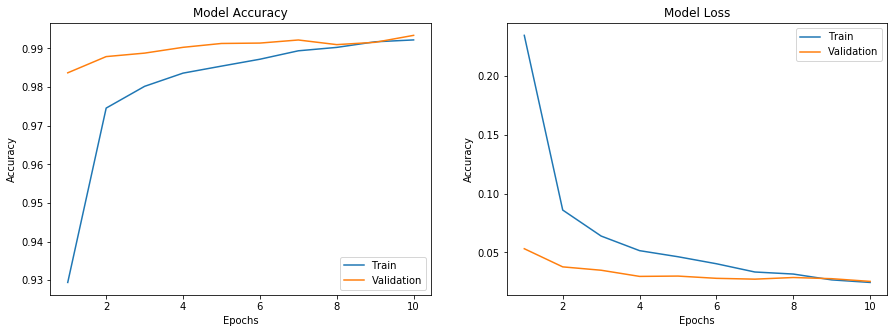

In [36]:
# learning curve
epoch_range = range(1,11)
fig = plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, history.history['accuracy'], label = "Train")
plt.plot(epoch_range, history.history['val_accuracy'], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_range, history.history['loss'], label = "Train")
plt.plot(epoch_range, history.history['val_loss'], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Loss")
plt.legend()